
# <center> Medical Insurance Cost Prediction using ANN

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
tf.random.set_seed(42)

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
data = pd.read_csv("Medical_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


There is no null values

In [4]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(2772, 7)

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### Checking for duplicated values

In [7]:
data.duplicated().sum()

1435

#### We have too many duplicated values,lets drop them.

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

### Explaratory data analysis

### Univariate analysis

In [9]:
univariate_list = ['age', 'bmi', 'charges']

### Histograms

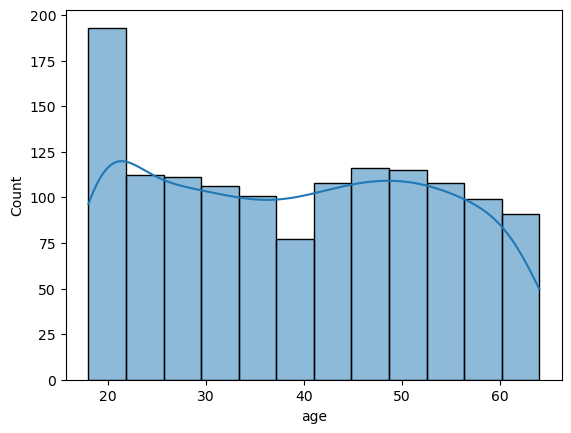

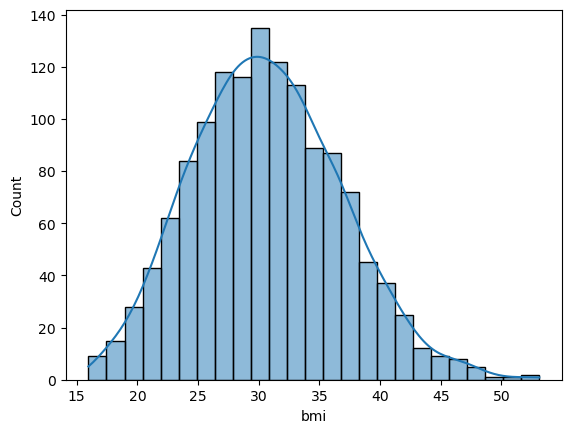

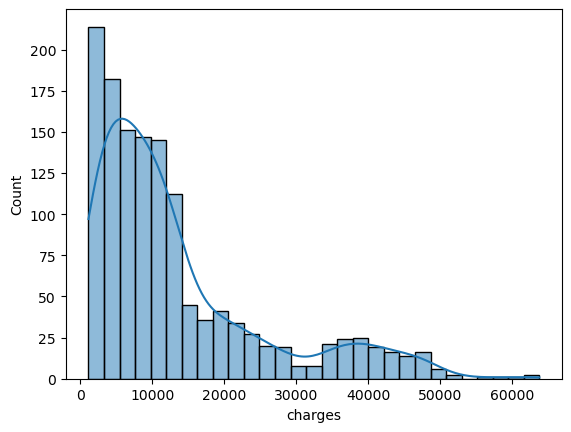

In [10]:
for i in univariate_list:
    sns.histplot(data[i], kde=True)
    plt.show()

Charges column is positively skewed. It may have lot of outliers in it.

### Box plot

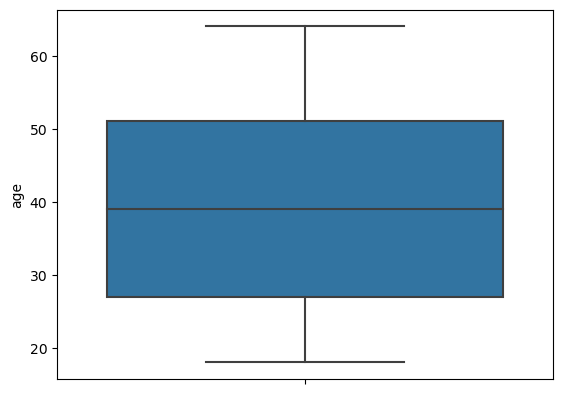

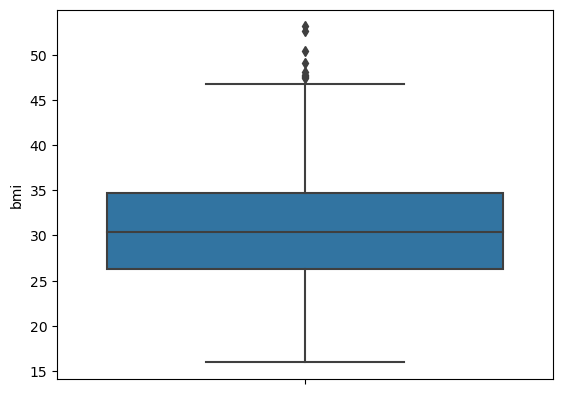

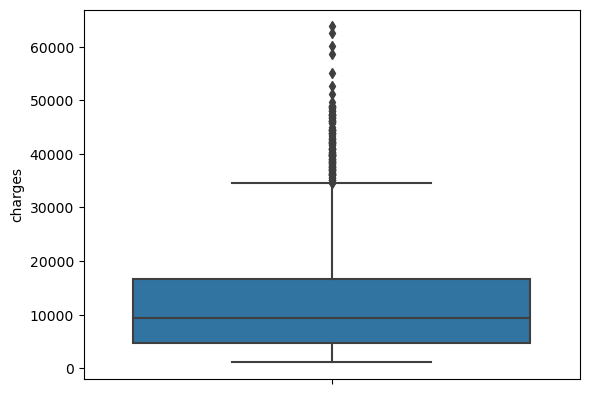

In [11]:
for i in univariate_list:
    sns.boxplot(y=data[i])
    plt.show()

#### There are outliers present on bmi and charges columns. So we need to remove them.

#### Multi variate analysis

### Count plot

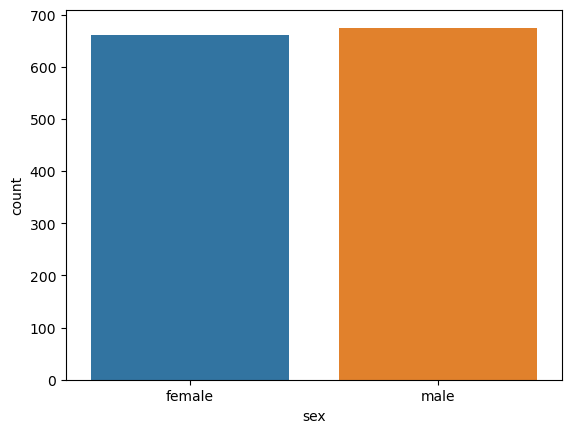

In [12]:
sns.countplot(data=data, x='sex')
plt.show()

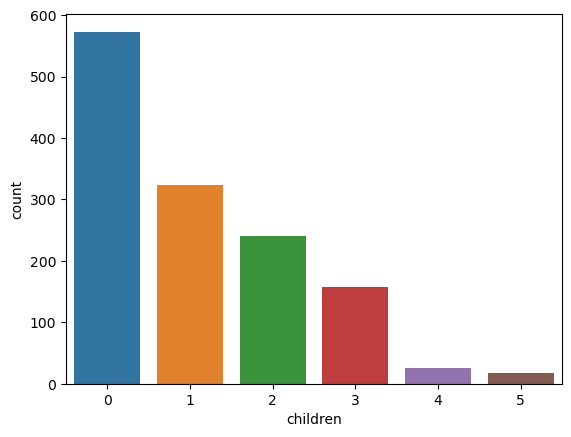

In [13]:
sns.countplot(data=data, x='children')
plt.show()

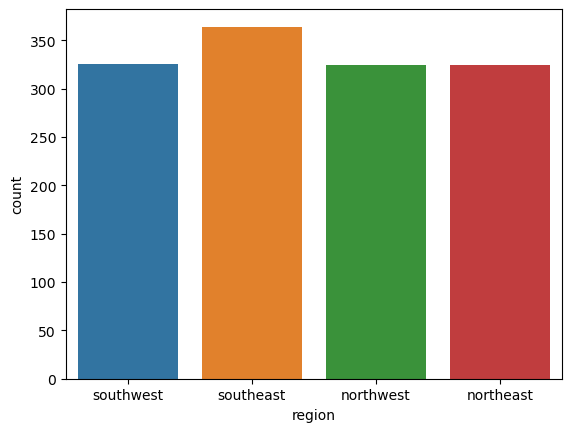

In [14]:
sns.countplot(data=data, x='region')
plt.show()

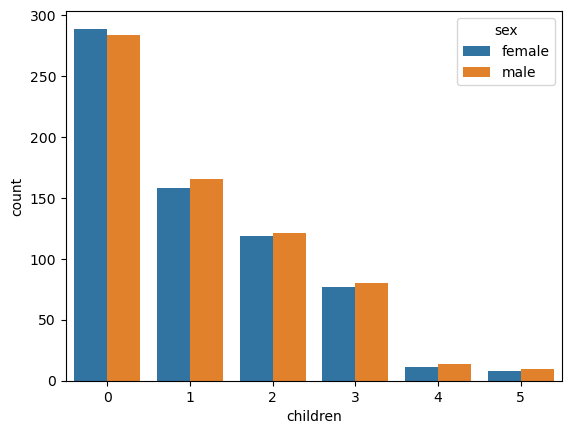

In [15]:
sns.countplot(data=data, x='children', hue='sex')
plt.show()

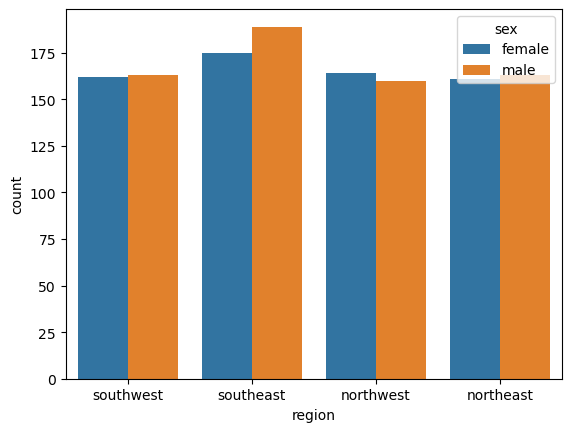

In [16]:
sns.countplot(data=data, x='region', hue='sex')
plt.show()

### Barplot

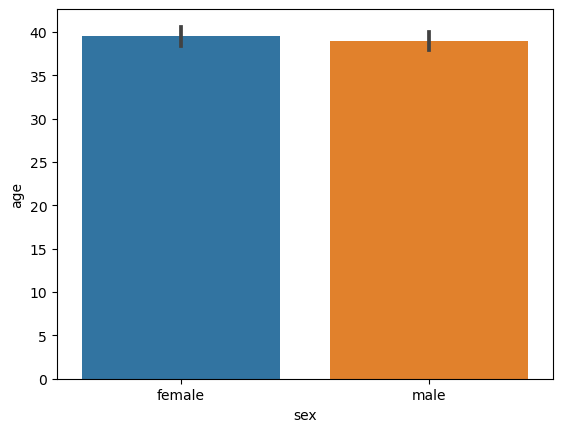

In [17]:
sns.barplot(data=data, x='sex', y='age')
plt.show()

In [18]:
age_sex = data.groupby(['sex'])['age'].mean()
age_sex

sex
female    39.503021
male      38.946667
Name: age, dtype: float64

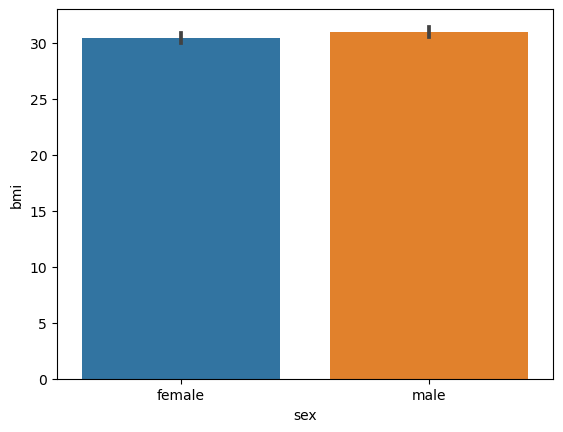

In [19]:
sns.barplot(data=data, x='sex', y='bmi')
plt.show()

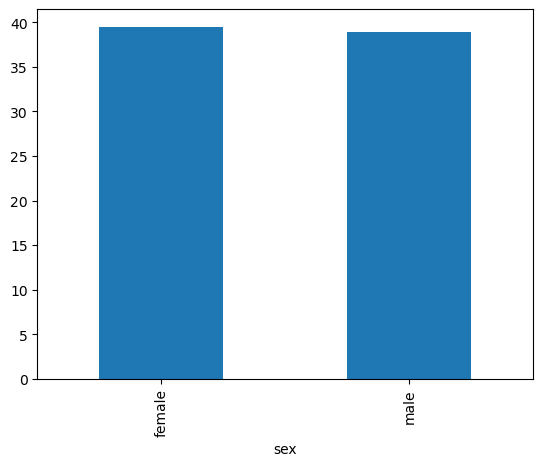

In [20]:
age_sex.plot.bar();

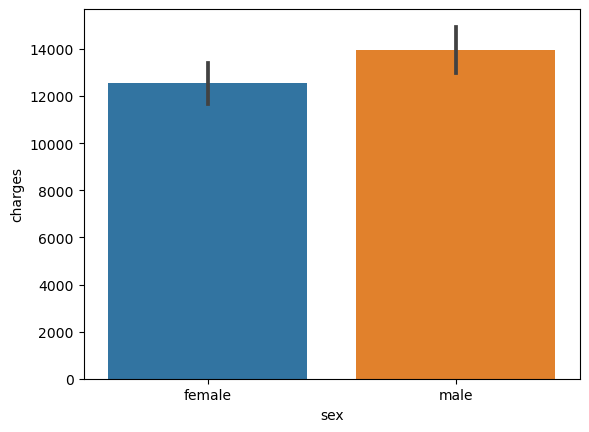

In [21]:
sns.barplot(data=data, x='sex', y='charges')
plt.show()

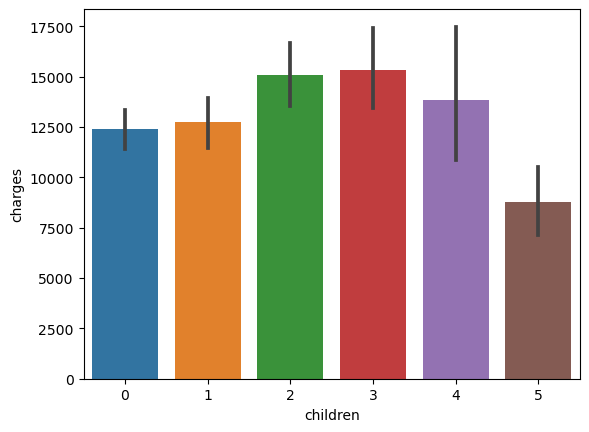

In [22]:
sns.barplot(data=data, x='children', y='charges')
plt.show()

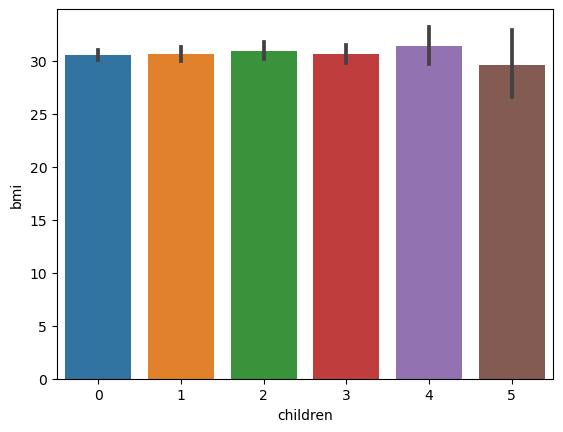

In [23]:
sns.barplot(data=data, x='children', y='bmi')
plt.show()

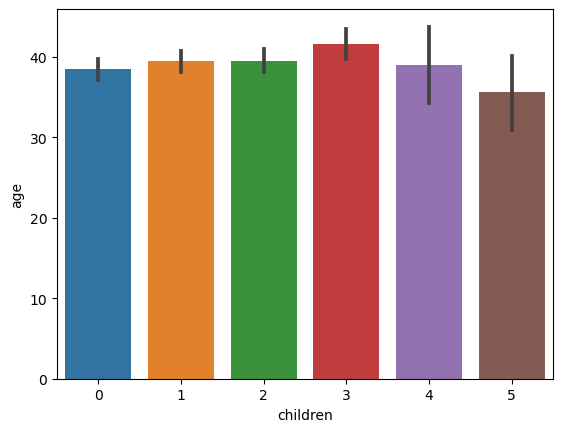

In [24]:
sns.barplot(data=data, x='children', y='age')
plt.show()

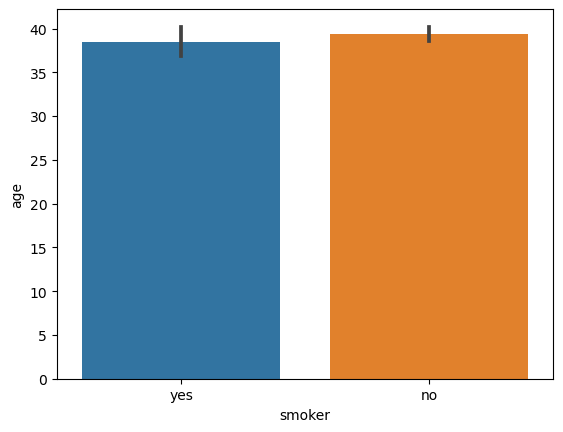

In [25]:
sns.barplot(data=data, x='smoker', y='age')
plt.show()

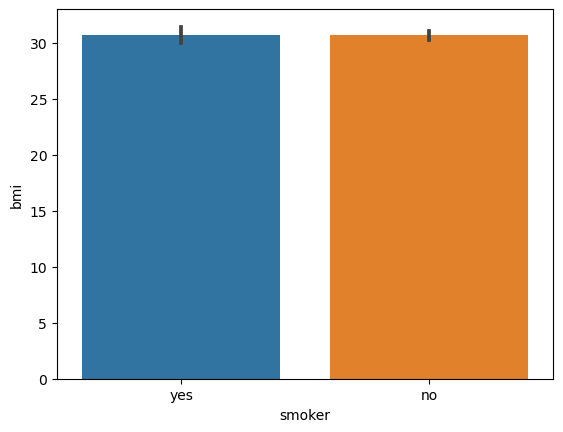

In [26]:
sns.barplot(data=data, x='smoker', y='bmi')
plt.show()

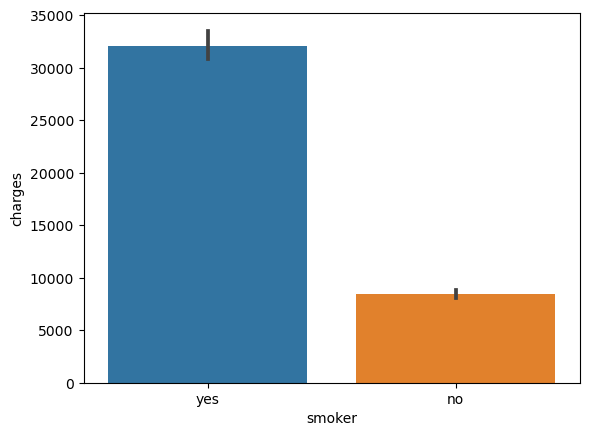

In [27]:
sns.barplot(data=data, x='smoker', y='charges')
plt.show()

### Line plot

In [28]:
data_age = data.sort_values(by='age')

In [29]:
data_age = data_age.reset_index()

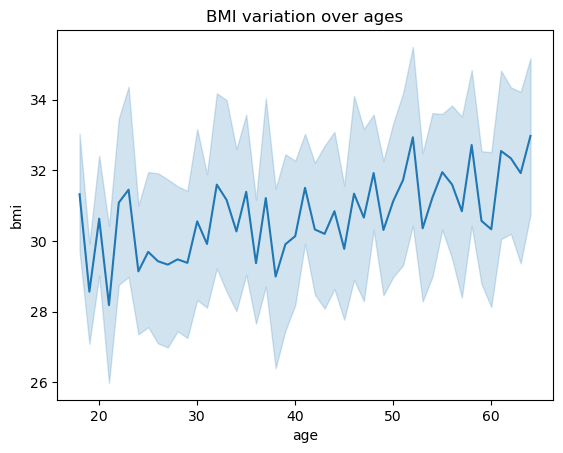

In [30]:
sns.lineplot(data=data_age, x='age', y='bmi')
plt.title("BMI variation over ages")
plt.show()

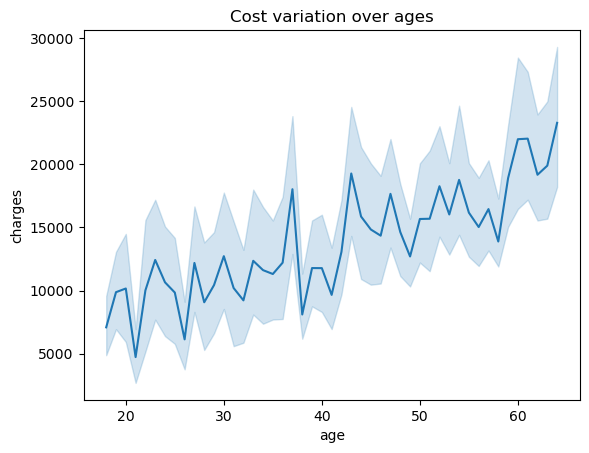

In [31]:
sns.lineplot(data=data_age, x='age', y='charges')
plt.title("Cost variation over ages")
plt.show()

### Scatter plot

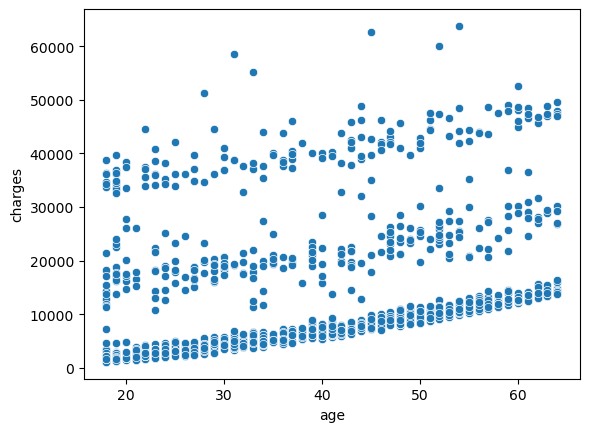

In [32]:
sns.scatterplot(data=data_age, x='age', y='charges')
plt.show()

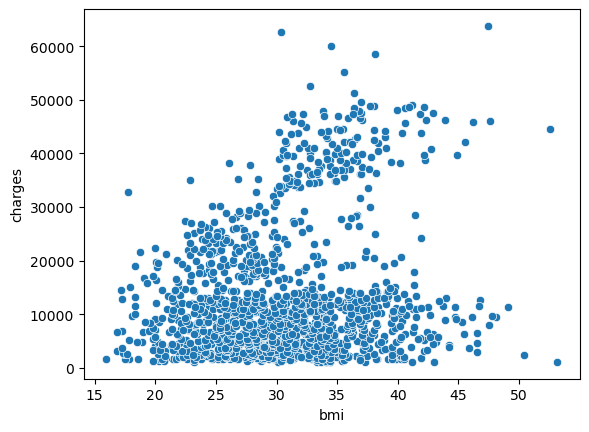

In [33]:
sns.scatterplot(data=data_age, x='bmi', y='charges')
plt.show()

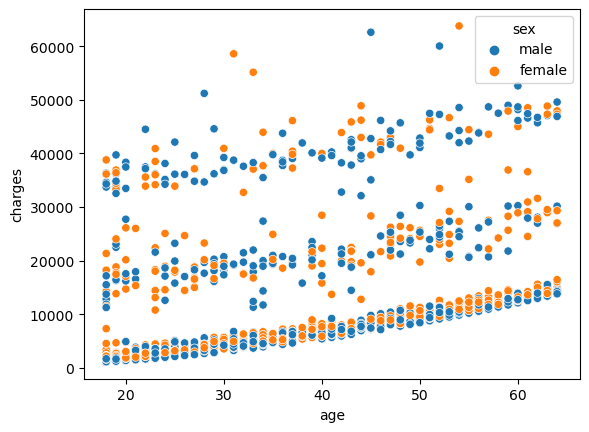

In [34]:
sns.scatterplot(data=data_age, x='age', y='charges', hue='sex')
plt.show()

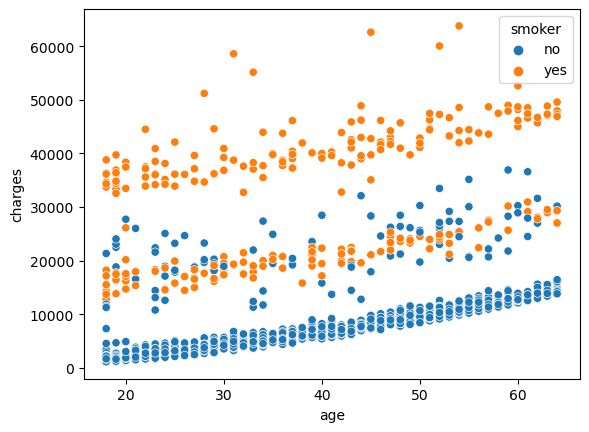

In [35]:
sns.scatterplot(data=data_age, x='age', y='charges', hue='smoker')
plt.show()

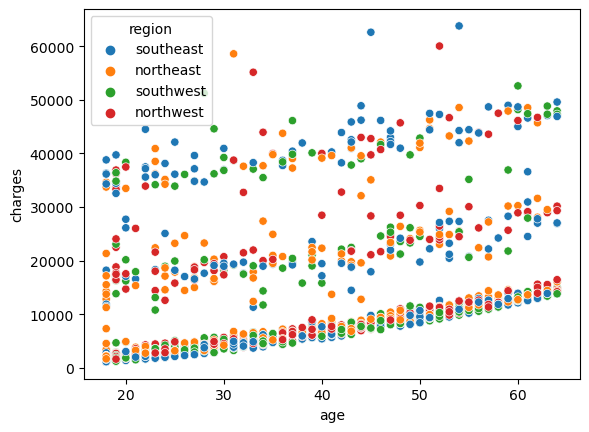

In [36]:
sns.scatterplot(data=data_age, x='age', y='charges', hue='region')
plt.show()

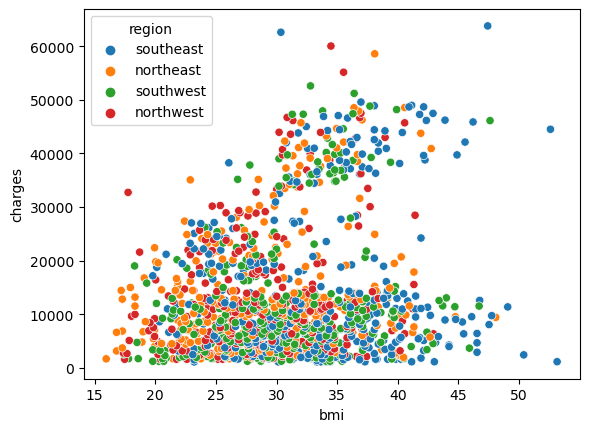

In [37]:
sns.scatterplot(data=data_age, x='bmi', y='charges', hue='region')
plt.show()

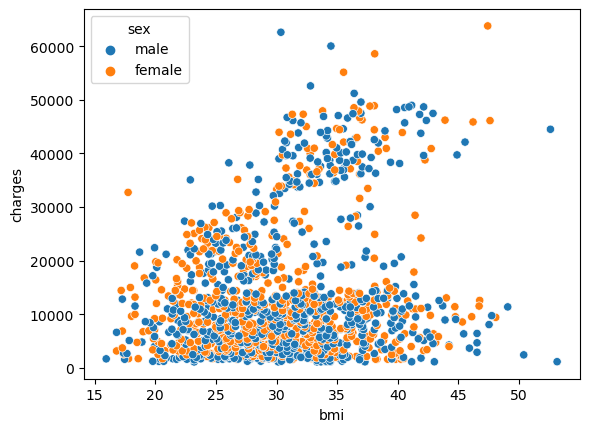

In [38]:
sns.scatterplot(data=data_age, x='bmi', y='charges', hue='sex')
plt.show()

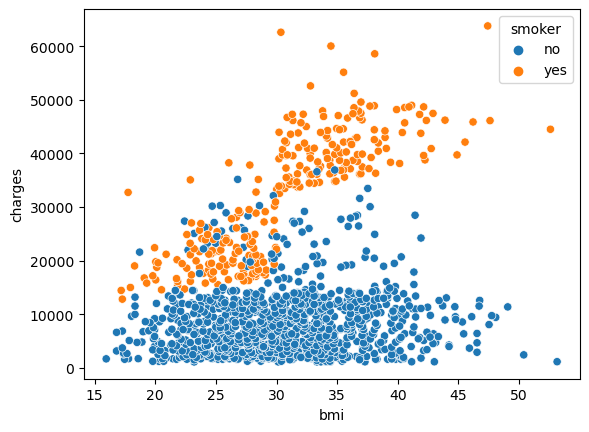

In [39]:
sns.scatterplot(data=data_age, x='bmi', y='charges', hue='smoker')
plt.show()

### Treating Outliers using IQR method

In [40]:
def outlier_limt(col):
    Q3, Q1 = np.nanpercentile(col,[75, 25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL

In [41]:
for i in univariate_list:
    UL, LL = outlier_limt(data[i])
    data[i] = np.where((data[i]>UL) | (data[i]<LL), np.nan, data[i])

In [42]:
data.isnull().sum()

age           0
sex           0
bmi           9
children      0
smoker        0
region        0
charges     139
dtype: int64

#### Lets remove the outliers.

In [43]:
data.dropna(inplace=True)

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


#### Checking the outliers again

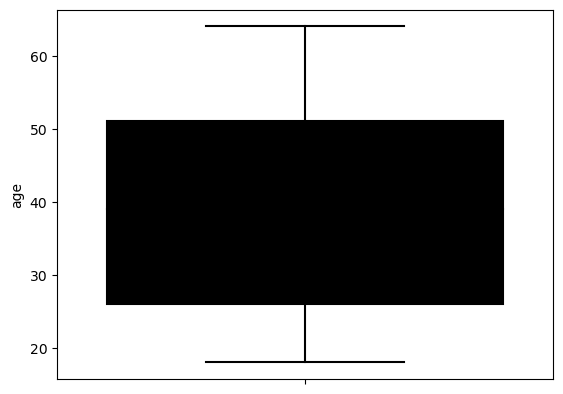

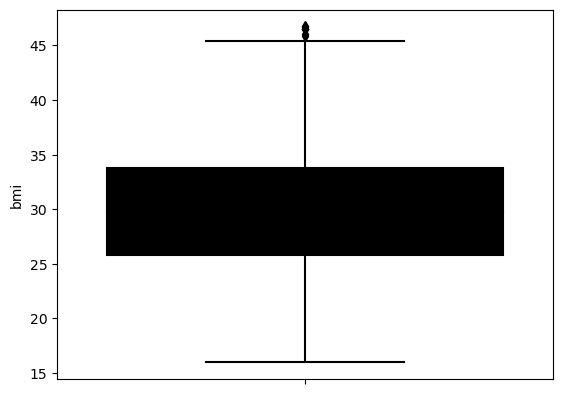

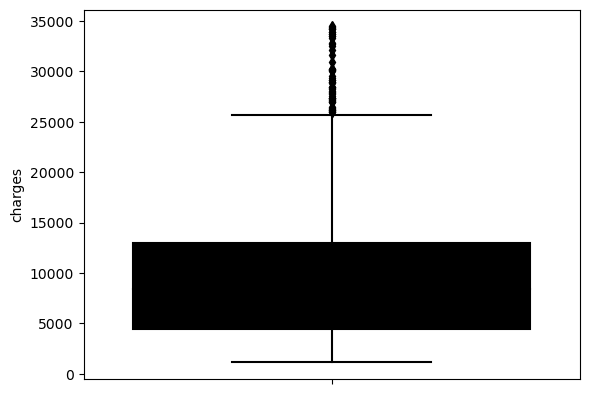

In [45]:
for i in univariate_list:
    sns.boxplot(y=data[i], color='black')
    plt.show()

#### We can see that the effect of outliers have reduced.

#### One hot encoding

In [46]:
data = pd.get_dummies(data=data, drop_first=True)

In [47]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,0,1,0,0,1
1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,32.0,28.880,0,3866.85520,1,0,1,0,0


#### Re arrange the colimns for convenience

In [48]:
data = data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']].copy()

In [49]:
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19.0,27.900,0,0,1,0,0,1,16884.92400
1,18.0,33.770,1,1,0,0,1,0,1725.55230
2,28.0,33.000,3,1,0,0,1,0,4449.46200
3,33.0,22.705,0,1,0,1,0,0,21984.47061
4,32.0,28.880,0,1,0,1,0,0,3866.85520


#### Splitting the data

In [50]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True)

#### Feature scaling

In [52]:
sc = StandardScaler()

In [53]:
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Define the model architecture

In [54]:
model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=x_train.shape[1])) # Add your desired number of units and activation function
model.add(layers.Dropout(0.2)) # Add dropout layer with a dropout rate of 0.2
model.add(layers.Dense(128, activation='relu')) # Add another dense layer
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu')) # Add another dense layer
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1)) # Output layer with 1 unit for regression

### Compile the model

In [55]:
model.compile(loss='mean_squared_error', optimizer='adam')

### Define early stopping criteria

In [56]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,  # Number of epochs with no improvement after which training will be stopped
    verbose=1  # Print updates
)

### Train the model with early stopping

In [57]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/500
28/28 [==============================] - 4s 32ms/step - loss: 146399824.0000 - val_loss: 166465408.0000
Epoch 2/500
28/28 [==============================] - 0s 11ms/step - loss: 145785984.0000 - val_loss: 164949888.0000
Epoch 3/500
28/28 [==============================] - 0s 12ms/step - loss: 142495712.0000 - val_loss: 158246368.0000
Epoch 4/500
28/28 [==============================] - 0s 15ms/step - loss: 131836072.0000 - val_loss: 138544496.0000
Epoch 5/500
28/28 [==============================] - 0s 12ms/step - loss: 105169640.0000 - val_loss: 98536872.0000
Epoch 6/500
28/28 [==============================] - 0s 11ms/step - loss: 65918128.0000 - val_loss: 49426484.0000
Epoch 7/500
28/28 [==============================] - 0s 11ms/step - loss: 34331412.0000 - val_loss: 27878162.0000
Epoch 8/500
28/28 [==============================] - 0s 12ms/step - loss: 27441842.0000 - val_loss: 24765960.0000
Epoch 9/500
28/28 [==============================] - 0s 11ms/step - loss: 24708

28/28 [==============================] - 0s 11ms/step - loss: 21042746.0000 - val_loss: 21485208.0000
Epoch 73/500
28/28 [==============================] - 0s 12ms/step - loss: 20547674.0000 - val_loss: 21465484.0000
Epoch 74/500
28/28 [==============================] - 0s 12ms/step - loss: 20866834.0000 - val_loss: 21467136.0000
Epoch 75/500
28/28 [==============================] - 0s 11ms/step - loss: 20464590.0000 - val_loss: 21379156.0000
Epoch 76/500
28/28 [==============================] - 0s 10ms/step - loss: 20541002.0000 - val_loss: 21352866.0000
Epoch 77/500
28/28 [==============================] - 0s 11ms/step - loss: 21625556.0000 - val_loss: 21263082.0000
Epoch 78/500
28/28 [==============================] - 0s 12ms/step - loss: 21251622.0000 - val_loss: 21324464.0000
Epoch 79/500
28/28 [==============================] - 0s 13ms/step - loss: 20820242.0000 - val_loss: 21482548.0000
Epoch 80/500
28/28 [==============================] - 0s 12ms/step - loss: 20831530.0000 - va

Epoch 143/500
28/28 [==============================] - 0s 14ms/step - loss: 19678532.0000 - val_loss: 21172190.0000
Epoch 144/500
28/28 [==============================] - 0s 13ms/step - loss: 20077926.0000 - val_loss: 21158000.0000
Epoch 145/500
28/28 [==============================] - 0s 12ms/step - loss: 20735824.0000 - val_loss: 21233420.0000
Epoch 145: early stopping


### Evaluating the model

In [58]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

10/10 [==============================] - 0s 5ms/step
Mean Squared Error: 21233418.63508015


### Plot the training and validation loss over epochs

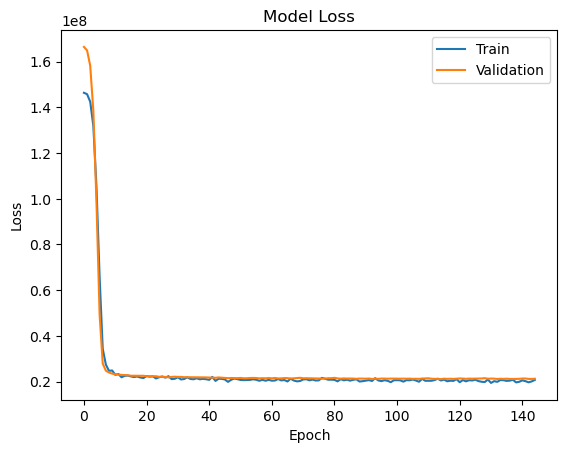

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [60]:
x = sc.fit_transform(x)

In [61]:
prediction = model.predict(x)

38/38 [==============================] - 0s 4ms/step


In [62]:
OUTPUT = pd.DataFrame(zip(y,prediction), columns=("ACTUAL", "PREDICTED"))
OUTPUT['PREDICTED'] = OUTPUT['PREDICTED'].astype(float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,16884.92400,19164.542969
1,1725.55230,3790.852539
2,4449.46200,6066.368652
3,21984.47061,4444.869141
4,3866.85520,4446.835938


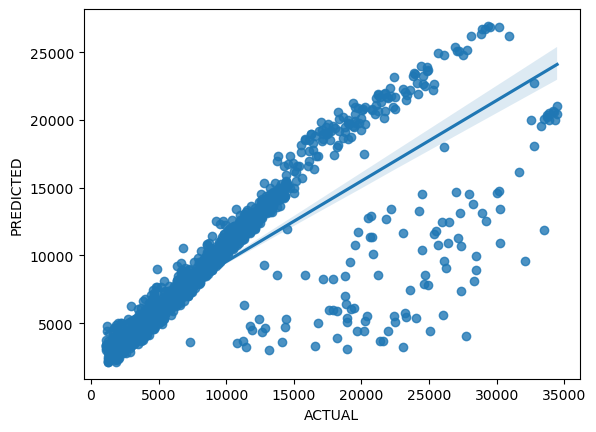

In [63]:
sns.regplot(data=OUTPUT, x= 'ACTUAL', y='PREDICTED')
plt.show()

In [64]:
r2_score(y, prediction)

0.6310940737136402